In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bagavathypriya/spam-ham-dataset")

print("Path to dataset files:", path)

100%|██████████| 207k/207k [00:00<00:00, 46.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bagavathypriya/spam-ham-dataset/versions/1


In [65]:
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
shutil.move('/root/.cache/kagglehub/datasets/bagavathypriya/spam-ham-dataset/versions/1' , '/content')

'/content/1'

In [67]:

df=pd.read_csv("/content/1/spamhamdata.csv",sep="\t",names=["label","message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df.shape

(5572, 2)

In [69]:
df.isnull().value_counts()

,,count
label,message,
False,False,5572


In [70]:
spam = 0
ham = 0
for lab in df['label']:
    if lab == 'spam':
        spam+=1
    else:
        ham+=1

In [71]:
spam , ham

(747, 4825)

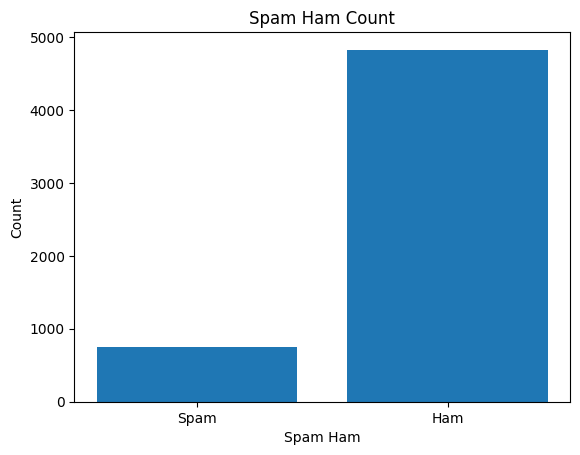

In [72]:
plt.title('Spam Ham Count')
plt.xlabel('Spam Ham')
plt.ylabel('Count')
plt.bar(['Spam' , 'Ham'] , [spam , ham])
plt.show()

0 --> Ham

1--> Spam

In [73]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [74]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
X = df['message']
Y = df['label']
X , Y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                 Will ü b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: message, Length: 5572, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: label, Length: 5572, dtype: int64)

In [76]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , random_state = 42 , shuffle=True , test_size = 0.2)

In [77]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [78]:
# convert text data into numerical value
vectorizer = TfidfVectorizer(stop_words='english' , lowercase = True)

In [79]:
x_train_vectorizer = vectorizer.fit_transform(x_train)
x_test_vectorizer = vectorizer.transform(x_test)

In [80]:
print(x_train_vectorizer)

  (0, 5513)	0.1898892037332199
  (0, 7223)	0.2173884735352799
  (0, 258)	0.2379428657041507
  (0, 7163)	0.2550284465664535
  (0, 354)	0.3544175987866074
  (0, 2725)	0.3544175987866074
  (0, 7301)	0.24288153842988894
  (0, 2050)	0.3034375179183143
  (0, 3263)	0.33791755486732394
  (0, 5801)	0.17558937755823417
  (0, 6265)	0.1898892037332199
  (0, 695)	0.3171299579602537
  (0, 2498)	0.2442158912653505
  (0, 5819)	0.22682143517864364
  (1, 3268)	0.26787130770292167
  (1, 6110)	0.32397626344658004
  (1, 6739)	0.28986069568917994
  (1, 2336)	0.21623212751660786
  (1, 5651)	0.3604441444703179
  (1, 3334)	0.20665394084233094
  (1, 2441)	0.3387054464839871
  (1, 4510)	0.40282459910606705
  (1, 3933)	0.24325511357721422
  (1, 3805)	0.19029023465152678
  (1, 2556)	0.3840709491751003
  :	:
  (4452, 3085)	0.22948428918295163
  (4452, 3291)	0.26370969643076225
  (4452, 3979)	0.4574160733416501
  (4452, 7281)	0.3968991650168732
  (4452, 2439)	0.4574160733416501
  (4452, 7265)	0.479751063610169
  (44

In [81]:
model = LogisticRegression()
model.fit(x_train_vectorizer , y_train)


LogisticRegression()

In [82]:
predictoion_train = model.predict(x_train_vectorizer)
accuracy_train = accuracy_score(y_train , predictoion_train)
print(accuracy_train)

0.9674669059905766


In [83]:
predictoion_test = model.predict(x_test_vectorizer)
accuracy_test = accuracy_score(y_test , predictoion_test)
print(accuracy_test)

0.9695067264573991


Building Predictive system

In [84]:
def predictive_system(input_mail):
    input_mail_vectorized = vectorizer.transform([input_mail])
    prediction = model.predict(input_mail_vectorized)
    if prediction[0] == 1:
        return 'Spam'
    else:
        return 'Ham'


In [85]:
input_mail = input("Enter the mail content")
result = predictive_system(input_mail)
print(f"The mail is classified as: {result}")

Enter the mail contentyou won $1000
The mail is classified as: Spam


In [87]:
import pickle
with open('email_classification.pkl', 'wb') as file:
    pickle.dump((model, vectorizer), file)

